
# MOGUNTIA exercises

---------
<FONT COLOR=red>

# The atmospheric CO$_2$ budget 

<FONT COLOR=black> 


----------


##### Maarten Krol, September 2018
##### version 2.0

### Goal

Simulate the growth in atmospheric mixing ratios of CO$_2$ as a result of fossil fuel emissions. Compare the simulated growth rate to observed growth rates and estimate what fraction of the emitted CO$_2$ stays in the atmosphere. Separate the ocean and biosphere CO$_2$ uptake.


### Introduction

The atmospheric concentration of CO$_2$ has been increasing from about 330 ppm in 1974 to about 400 ppm in 2015 (see figure 1). There is little doubt that the anthropogenic CO$_2$ emissions that are related to fossil fuel use are responsible for the increase in atmospheric CO$_2$ concentrations. 
But what would be the increase in atmospheric concentrations if all the CO$_2$ would remain in the atmosphere? 
And what is the gradient between the Northern Hemisphere (most emissions) and the Southern hemisphere (less emissions)?
To test this, CO$_2$ will be added to the MOGUNTIA model as an non-reactive tracer with only fossil fuel emissions. Other processes, such as uptake by the biosphere, oceans, and emission as a result of biomass burning, are ignored.
<figure>
  <img src="MLO.png", width="600" height="400">
  <figcaption> <i>Figure 1: Atmospheric CO$_2$ concentrations measured at Mauna Loa by NOAA/ESRL, Units are in $\mu$mol mol$^{-1}$ which is equivalent to ppm.
</i></figcaption>
</figure>

In order to compare to model to a real atmosphere, measurements taken by NOAA ESRL will be used. The link is given below. Also, the Carbon Dioxide Information Analysis Center provides estimates of world-wide CO$_2$ emissions. The web-addresses are used throughout the exercises.

<table>
  <caption>Table 1: Relevant web-addresses for the exercises</caption>
<tr>
<td>CO$_2$ measurements made by NOAA ESRL</td>
<td><a href="http://www.esrl.noaa.gov/gmd/dv/iadv/">http://www.esrl.noaa.gov/gmd/dv/iadv/</a></td>
</tr>
<tr>
<td>CDIAC estimates of fossil emissions CO$_2$</td>
<td><a href="http://cdiac.ornl.gov/trends/emis/overview_2006.html">http://cdiac.ornl.gov/trends/emis/overview_2006.html</a></td>
</tr>
</table>

In the following exercises, it will be attempted to:

* Quantify the relation between fossil fuel emissions and CO$_2$ growth rates
* Investigate wether the North-South gradient is well simulated by the model
* Estimate what fraction of the fossil fuel emissions stays in the atmosphere
* Study the impact of uptake by oceans and biosphere



### Exercise 1: CO$_2$ rate of change

First, the MOGUNTIA model has to initialised. A prelimanary input file fossil.in is provided as a starting point. Note that the **MOLMASS** is defined as 12, since all fossile input data are normally given in Millions of Tonnes (1 pG = 1000 Million Tonnes) of carbon. Note also that the CO$_2$ emission distribution is read from a file. Logically, highest emissions are found over industrialised and densily populated areas.

Initially, the model will be run for four years (2000, 2001, 2002, 2003) with the CDIAC fossil fuel emissions.

> * Run MOGUNTIA (**Shift-Enter** in cell below) with the input file **fossil.in**
>>  You can add stations in **fossil.in** if you like (see <a href="http://www.staff.science.uu.nl/~krol0101/moguntia/MANUAL/moguntia.doc/">description model input</a>)

> * Analyze the output (**Shift-Enter** in the *Analysis widgets* cell). Note the CO$_2$ is normally given in units **ppm**

>  Q1: Where do you observe the highest concentrations at the surface?

>  Q2: Discuss the growth rate observed at the stations

>  Q3: How does the growth rate compare to the observed growth-rate at measurement stations?

>  Q4: Estimate the North-South gradient and compare to observations


> * In order to get a first estimate of the CO$_2$ that is taken up by the oceans and biosphere, try to reduce the emissions and rerun the model to get a better correspondance to observations. If needed, adjust the initial concentration and/or the end date:
        START_CONCENTRATION 360e3
        END_DATE 20040101




In [1]:
# MOGUNTIA run widgets:
%pylab inline
from pylab import *
from Cmoguntia import *
xlf = CMoguntia()

ValueError: unknown locale: UTF-8

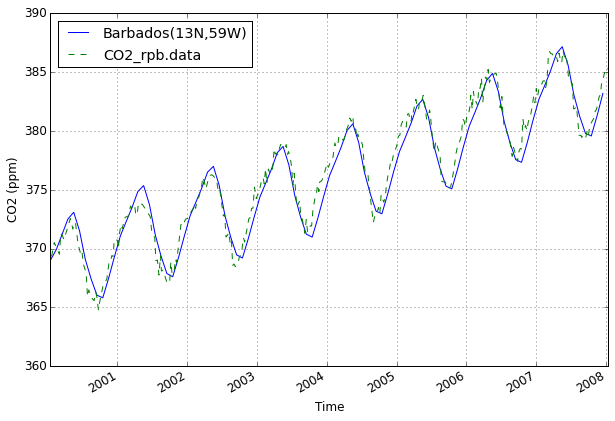

In [2]:
# analysis widgets:
from plot_moguntia_new import *
pm = plot_moguntia_new(xlf)

### Exercise 2: Uptake of CO$_2$

In order to estimate the long-term average uptake of CO$_2$ in a more sophisticated way, the diagram depicted in Figure 2 is used.

<figure>
  <img src="co2_budget.png", width="600" height="400">
  <figcaption> <i>Figure 2: Diagram showing the estimated budget for CO$_2$. Blue numbers indicate fluxes in GtC/yr and black numbers indate reservoirs in GtC. 1 GtC corresponds to 10$^{12}$ gC, or 1 PgC.
</i></figcaption>
</figure>

From the net uptake of CO$_2$, e.g. to the oceans, a lifetime can be calculated by dividing the atmospheric burden by the net-uptake. The task is now to test these numbers in MOGUNTIA. For that reason, the input file is modified in the following way:

> * Extend the simulation period, e.g. to 1995-2003 by looking up the relevant emission data (see link above)
> * Define some stations that can be directly compared to measurements (NOAA ESRL)
> * Define a correct initial concentration, based on measured atmospheric concentrations
> * Examine **fossil2.in** to see how to use SINK to calculate the uptake by oceans and/or the biosphere
> * Calculate the CO$_2$ growth with and without the biosphere uptake

Address the following issues:

> Q5: How does the biosphere affect the growthrate of CO$_2$?

> Q6: How is the seasonal cycle affected on the northern and southern hemispheres?

> Q7: How do the new simulations compare to measurements?

> Q8: Repeat the calculations for:

>> The sink to the oceans (SINK FILE co2_sink_oc.dat)

>> The sink to both the oceans and the biosphere (SINK FILE co2_sink_ocbio.dat)

> Q9: Discuss the results and compare to measurement time series.

### Extra: Land Sink

The land sink is largely uncertain. In order to improve the comparison between model and observations, an extra option is included that allows to define an extra uptake of CO$_2$ by the land biosphere:

            SINK EXTRA_LAND 1

This statement in the input file will enhance the land sink by 1 PgC yr$^{-1}$.

> * Edit input file **fossil3.in**. Adjust the extra land sink, check the yearly emissions, and test

> Q10: What is the magnitude of the land sink that leads to the "best" match with observations?

>>  You are stimulated to compare to station observations at various latitudes, over land, and over oceans


In [1]:
# MOGUNTIA run widgets:
%pylab inline
from pylab import *
from Cmoguntia import *
xlf2 = CMoguntia()

 HDF read asland returns: 0
  Pressure (hPa) - Height (m)
    1000.0        0.
     900.0      909.
     800.0     1904.
     700.0     3005.
     600.0     4241.
     500.0     5658.
     400.0     7326.
     300.0     9375.
     200.0    12079.
     100.0    16245.
 Simulation year: 2000
 CO2                                                                             
 CO2                                                                             
 CO2                                                                             
 CO2                                                                             
 CO2                                                                             
 CO2                                                                             
 CO2                                                                             
 CO2                                                                             
 CO2                                                 

In [3]:
# analysis widgets:
from plot_moguntia_new import *
pm2 = plot_moguntia_new(xlf2)